In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
from matplotlib import cm
from skimage import color
from skimage import io
import skimage
import numba
from numba import jit

In [2]:
edge = np.linspace(-1,1,300)
upper_y = np.cos(np.pi*edge/2)
lower_y = edge**4
upper_x = (np.exp(edge)-np.e)/(np.e**-1-np.e)
lower_x = 0.3*(edge**2 - edge)

In [3]:
xv, yv = np.meshgrid(edge,edge)

In [4]:
@numba.jit(nopython=True)
def compute_potential(potential, n_iteration, mask=None):
    length = len(potential[0])
    if mask!=None:
        potential += mask
    for n in range(n_iteration):
        for i in range(1,length-1):
            for j in range(1,length-1):
                if mask!=None and not mask[i][j]:
                    potential[i][j] = 0.25*(potential[i-1][j]+potential[i][j-1]+potential[i+1][j]+potential[i][j+1])
    return potential

In [5]:
def get_potential_boundary(sizex=300,sizey=300):
    potential = np.zeros((sizex,sizey))
    potential[0,:] = lower_y
    potential[-1,:] = upper_y
    potential[:,0] = lower_x
    potential[:,-1] = upper_y
    return potential

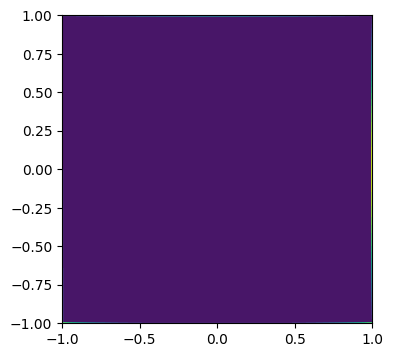

In [6]:
plt.figure(figsize=(4,4))
potential = get_potential_boundary()
plt.contourf(xv,yv,potential,30)

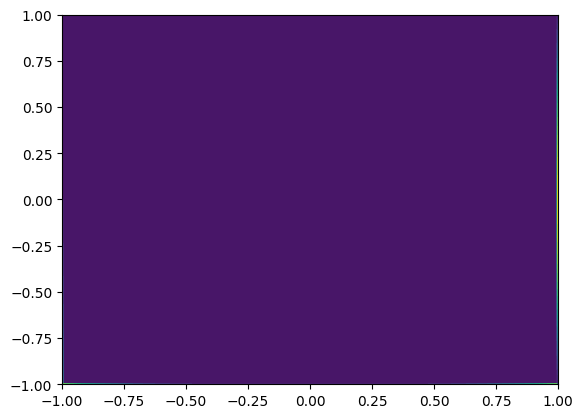

In [7]:
compute_potential(potential,1000)
plt.contourf(xv,yv,potential,30)

In [8]:
def potential_ark(x,y,xc,yc,r1,r2,strength):
    return np.select([(r1<=((xc-x)**2+(yc-y)**2))*(((xc-x)**2+(yc-y)**2)<=r2)*(np.arctan2((yc-y),(xc-x))>-np.pi/2),True],[strength,0])

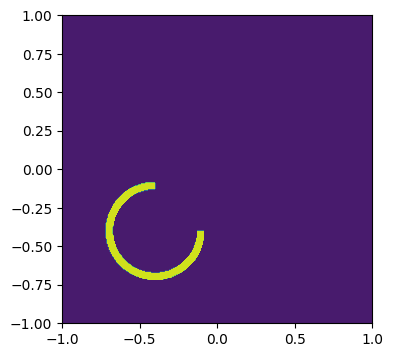

In [9]:
plt.figure(figsize=(4,4))
plt.contourf(xv,yv,potential_ark(xv,yv,-0.4,-0.4,0.075,0.1,1))

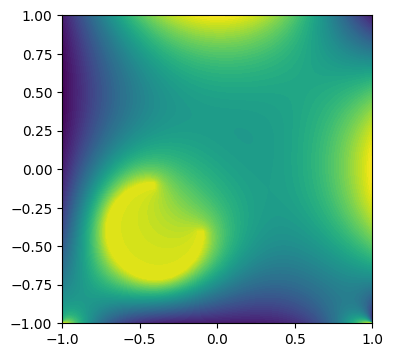

In [10]:
potential = get_potential_boundary()
ring = potential_ark(xv,yv,-0.4,-0.4,0.075,0.1,0.95)
compute_potential(potential,10000,ring)
plt.figure(figsize=(4,4))
plt.contourf(xv,yv,potential,90)

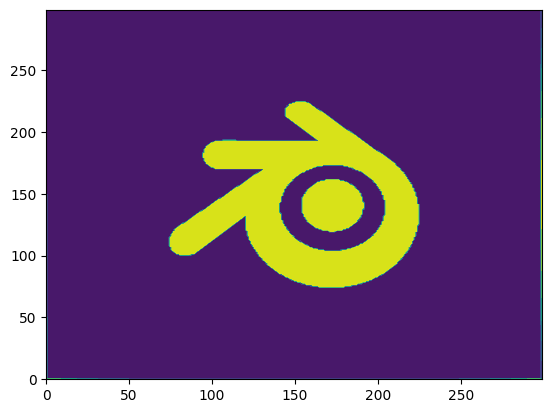

In [11]:
img = io.imread('./blender-1-logo-png-transparent.png')
img[np.where(img[:,:,3]!=0)] = (255,255,255,255)
img[np.where(img[:,:,3]==0)] = (0,0,0,255)
img = skimage.color.rgb2gray(skimage.color.rgba2rgb(img))
img = skimage.transform.resize(img, (edge.size/2,edge.size/2), anti_aliasing=False)
img = np.flipud(img)
blenderLogo = get_potential_boundary()
blenderLogo[int(edge.size/4) : int(edge.size*3/4) , int(edge.size/4) : int(edge.size*3/4)] = img[:,:]
plt.contourf(blenderLogo)

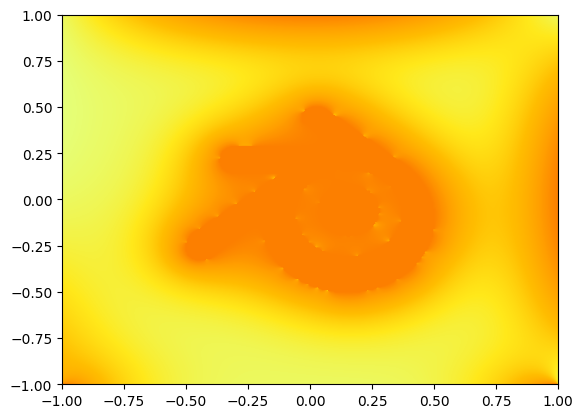

In [28]:
potential = np.zeros((edge.size,edge.size))
compute_potential(potential,1000,blenderLogo)
plt.set_cmap('Wistia')
plt.contourf(xv,yv,potential,600)